In [1]:
import pandas as pd
import seaborn as sns

In [60]:
pd.set_option('max_colwidth',500)

In [2]:
data = pd.read_csv('../feature/data_cutted.csv')

In [3]:
data.head()

,id,content,source,length
0,yhM4ivIm,ft ir 产物 结构 进行 分析 扫描电镜 查看 喷洒 抑尘剂 煤粉 固化 表面 形貌,train,43
1,OeJidjGX,方法 利用 硅胶 ods 及大孔 树脂 hp 多种 色谱 方法 对密 花石 豆兰 乙醇 提取...,train,67
2,4wWp3dGK,聚烯烃 技术 快速 发展 市场占有率 不断 提高 关键 科学技术 发展 引起 学术界 产业界...,train,49
3,T0senQto,猪脑 心肌炎 病毒 emcv gxlc 基因组 序列 设计 一对 特异性 引物 应用 rt...,train,116
4,1jAboq7C,结果表明 实生苗 造林 萌芽 更新 杉木 林分 树高 胸径 材积 生长 插条 造林 实生苗 ...,train,73


/Users/zhoujingjing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


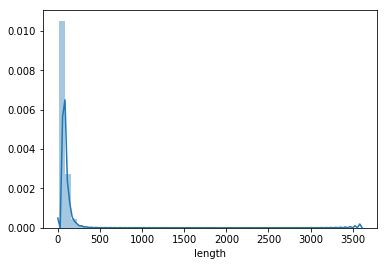

In [4]:
sns.distplot(data[data['source']=='train']['length'])

/Users/zhoujingjing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


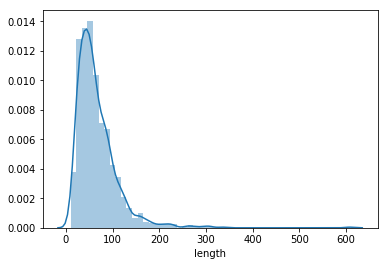

In [5]:
sns.distplot(data[data['source']=='test']['length'])

/Users/zhoujingjing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


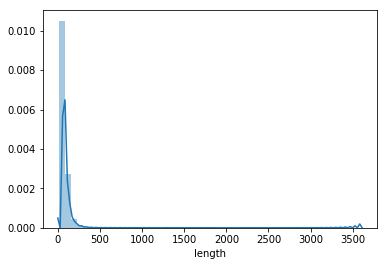

In [6]:
sns.distplot(data['length'])

---

In [63]:
result_p = pd.read_csv('../output/comb_freq_threshold50.csv')
result_r = pd.read_csv('../output/comb_3freq_threshold50.csv')

In [64]:
result_p.rename(columns = {'result':'id'},inplace=True)
result_p = result_p.merge(data)

result_p.rename(columns = {'id':'result','test_id':'id','content':'result_content','length':'result_length'},inplace=True)
result_p = result_p.merge(data,on='id')
result_p['length_rate'] = result_p['result_length']/result_p['length']
result_p[result_p['length_rate'] == result_p['length_rate'].max()]

,id,result,result_content,source_x,result_length,content,source_y,length,length_rate
309,3SBHY5jO,iGcufsxI,目前 国内 河流 湖泊 底泥 重金属 研究 偏重于 重金属 分布 污染 特征 重金属 生物 生态 影响 底泥 重金属 治理 研究 相对,train,63,现有 研究 很少 底泥 重金属 治理 方法 集中 重金属 生态 影响 分布 污染 特性,test,42,1.5


/Users/zhoujingjing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


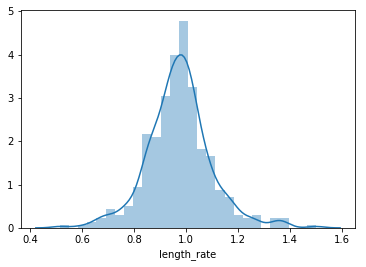

In [65]:
sns.distplot(result_p['length_rate'])

In [66]:
result_r.rename(columns = {'result':'id'},inplace=True)
result_r = result_r.merge(data)

result_r.rename(columns = {'id':'result','test_id':'id','content':'result_content','length':'result_length'},inplace=True)
result_r = result_r.merge(data,on='id')
result_r['length_rate'] = result_r['result_length']/result_r['length']
result_r[result_r['length_rate'] == result_r['length_rate'].max()]

,id,result,result_content,source_x,result_length,content,source_y,length,length_rate
343,jb1UMCpn,9rPFwnDS,研究 结果表明 裙式 吸力 基础 设置 结构 显著 提高 抵抗 平静 循环 水平 动力 荷载 能力 有效 控制 基础 水平 位移 值得 推广应用 一种 新型 海洋工程 基础 形式,train,84,提出 一种 改进 基础 形式 裙式 吸力 基础,test,22,3.818182


/Users/zhoujingjing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


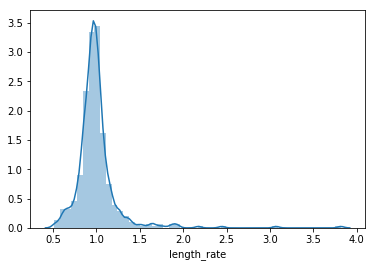

In [67]:
sns.distplot(result_r['length_rate'])

In [68]:
result_r.shape

(466, 9)

/Users/zhoujingjing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


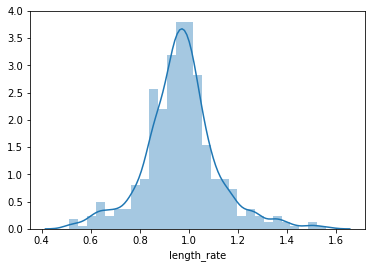

In [70]:
sns.distplot(result_r[result_r['length_rate']<1.6]['length_rate'])

- 0.55-1.45

In [86]:
output = result_r[(result_r['length_rate']<1.45) & (result_r['length_rate']>0.55)]
output.drop(['result_content','source_x','result_length','content','source_y','length','length_rate'],axis=1,inplace = True)

/Users/zhoujingjing/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [89]:
output.columns = ['test_id','length_output']

In [90]:
sub = pd.read_csv('../input/smp_sample.csv')

In [99]:
sub = sub.merge(output,how='left')

In [101]:
sub.drop('result',axis=1,inplace=True)

In [103]:
sub.columns = ['test_id','result']

In [107]:
sub.to_csv('../output/length_cut.csv')

In [109]:
sub['result'].count()

447